# Install dependancies

In [7]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy

# Import and explore the data

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
# import data dataframe
df = pd.read_csv('./data/Churn_Modelling.csv')

In [10]:
# explore the data
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
import pandas_profiling



AttributeError: 'DataFrame' object has no attribute 'pandas_profiling'

In [13]:
# compare by groups
df_gender_pay = df.groupby(['Gender']).mean()
df_gender_pay

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,,,
Female,4942.929562,1.569115e+07,650.831389,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382,0.250715
Male,5048.427891,1.569077e+07,650.276892,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931,0.164559


In [14]:
# addiitonal methods available to pd.DataFrame
dir(pd.DataFrame)

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',

In [ ]:
# quick visualisations using seaborn - for all data in the dataframe that are integers
sns.pairplot(df.loc[:,df.dtypes == 'int64'])

In [ ]:
# corrleation matrix using seaborn - again for all data in the dataframe that are integers
corr = df.loc[:,df.dtypes == 'int64'].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

# ANN (Artificia Neural Network)

## part 1 - data prep

In [15]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
df.head()

In [16]:
def dataprep(dataset):
    # Pre-processing
    # define the outcome (iv) and predictors (dv's) from the data set
    X = dataset.iloc[:, 3:13].values
    y = dataset.iloc[:, 13].values

    # encode the labels in columns 1 & 2
    labelencoder_X_1 = LabelEncoder()
    X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
    labelencoder_X_2 = LabelEncoder()
    X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])

    # need to onehot enocde columns 1 - country
    onehotencoder = OneHotEncoder(categorical_features=[1])
    X = onehotencoder.fit_transform(X).toarray()
    # drop the first column to avoid the dummay var trap
    X = X[:, 1:]
    
    print(X)
    
    # split the dataset between train and test
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # feature scaling
    sc = StandardScaler()
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)
    
    return x_train, y_train, x_test, y_test



In [17]:
x_train, y_train, x_test, y_test = dataprep(df)

[[0.0000000e+00 0.0000000e+00 6.1900000e+02 ... 1.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [0.0000000e+00 1.0000000e+00 6.0800000e+02 ... 0.0000000e+00
  1.0000000e+00 1.1254258e+05]
 [0.0000000e+00 0.0000000e+00 5.0200000e+02 ... 1.0000000e+00
  0.0000000e+00 1.1393157e+05]
 ...
 [0.0000000e+00 0.0000000e+00 7.0900000e+02 ... 0.0000000e+00
  1.0000000e+00 4.2085580e+04]
 [1.0000000e+00 0.0000000e+00 7.7200000e+02 ... 1.0000000e+00
  0.0000000e+00 9.2888520e+04]
 [0.0000000e+00 0.0000000e+00 7.9200000e+02 ... 1.0000000e+00
  0.0000000e+00 3.8190780e+04]]


C:\Users\Graham\.conda\envs\py37\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Graham\.conda\envs\py37\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [18]:
y_train

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

## build classifier

In [19]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [20]:
def build_classifier():
    # Initialising the ANN
    classifier = Sequential()

    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units=6, kernel_initializer='glorot_uniform', activation='relu', input_dim=11))

    # Adding the second hidden layer
    classifier.add(Dense(units=6, kernel_initializer='glorot_uniform', activation='relu'))

    # Adding the output layer
    classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

    # Compiling the ANN
    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return classifier

In [21]:
classifier = build_classifier()

Instructions for updating:
Colocations handled automatically by placer.


In [22]:
# train the network
# hyperparameters

batch_size = 40 
epochs = 100

classifier.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
8000/8000 [==============================] - 2s 252us/step - loss: 0.5913 - acc: 0.6682
Epoch 2/100
8000/8000 [==============================] - 0s 49us/step - loss: 0.4710 - acc: 0.7955
Epoch 3/100
8000/8000 [==============================] - 0s 55us/step - loss: 0.4439 - acc: 0.8045
Epoch 4/100
8000/8000 [==============================] - 0s 53us/step - loss: 0.4284 - acc: 0.8160
Epoch 5/100
8000/8000 [==============================] - 0s 52us/step - loss: 0.4158 - acc: 0.8224
Epoch 6/100
8000/8000 [==============================] - 0s 51us/step - loss: 0.4034 - acc: 0.8311
Epoch 7/100
8000/8000 [==============================] - 0s 53us/step - loss: 0.3909 - acc: 0.8388
Epoch 8/100
8000/8000 [==============================] - 1s 67us/step - loss: 0.3795 - acc: 0.8454
Epoch 9/100
8000/8000 [==============================] - 1s 72us/step - loss: 0.3700 - acc: 0.8490
Epoch 10/100
8000/8000 [==============================] - 0s

8000/8000 [==============================] - 1s 72us/step - loss: 0.3321 - acc: 0.8619
Epoch 80/100
8000/8000 [==============================] - 0s 58us/step - loss: 0.3319 - acc: 0.8619
Epoch 81/100
8000/8000 [==============================] - 1s 70us/step - loss: 0.3314 - acc: 0.8628
Epoch 82/100
8000/8000 [==============================] - 1s 71us/step - loss: 0.3317 - acc: 0.8623
Epoch 83/100
8000/8000 [==============================] - 1s 74us/step - loss: 0.3317 - acc: 0.8622
Epoch 84/100
8000/8000 [==============================] - 0s 62us/step - loss: 0.3318 - acc: 0.8626
Epoch 85/100
8000/8000 [==============================] - 1s 80us/step - loss: 0.3315 - acc: 0.8618
Epoch 86/100
8000/8000 [==============================] - 0s 53us/step - loss: 0.3314 - acc: 0.8640
Epoch 87/100
8000/8000 [==============================] - 0s 52us/step - loss: 0.3311 - acc: 0.8612
Epoch 88/100
8000/8000 [==============================] - 0s 50us/step - loss: 0.3312 - acc: 0.8616
Epoch 89/100


In [23]:
# test set predictions
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)


In [24]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [25]:
print(cm)

[[1514   81]
 [ 196  209]]


In [27]:
print(f'percent correct: {((1_514 + 209) / (1_514 + 81 + 196 + 209)) * 100:.2f}%')

percent correct: 86.15%


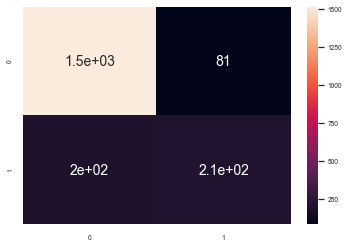

In [28]:
df_cm = pd.DataFrame(cm, range(2),  range(2))
sns.set(font_scale=.6)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 14})# font size